## Crawling data from forum - entry level luxury performance sedans

In [1]:
# Import webdriver from selenium
from selenium import webdriver
chrome_path = r'chromedriver'

In [58]:
data_list=[]

In [68]:
import time
time1 = time.time()
import re
for i in range(1,181): 
    driver = webdriver.Chrome(chrome_path)
    driver.get("http://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p"+str(i))
    all_page_i=driver.find_elements_by_class_name('ItemComment')
    for post in all_page_i:
        data={}
        text=post.text
        data["userid"]=re.findall(r'.+Posts',text)[0].rstrip(' Posts')
        data["postcount"]=re.findall(r'Posts: \d+[\,\d+]*', text)[0].lstrip('Posts: ')
        if len(re.findall(r'\n\w+ \d+\n',text))>0:
            data["date"]=re.findall(r'\n\w+ \d+\n',text)[0].lstrip('\n').rstrip('\n')
        else:
            data["date"]=None
        if len(re.findall(r'.+\n\w+ \d+\n',text))>0:
            k=len(re.findall(r'.+\n\w+ \d+\n',text)[0])
            data["post"]=text[k:]
        else:
            data['post']=None
        data_list.append(data)
    driver.close()
time2 = time.time()
print("Succeed: page 1-20: " + str(time2 - time1))

Succeed: page 1-20: 456.9188938140869


In [69]:
len(data_list)

5400

In [ ]:
import pandas as pd
df = pd.DataFrame(data_list)
df.to_csv("text.csv", index=False)

## frequency

In [2]:
# import data
import pandas as pd

df=pd.read_csv('text_notna.csv')
brand_model=pd.read_csv('brand_model.csv')

In [3]:
# remove (.,?) 
import re

s_brand=brand_model['brand'].map(lambda x:x.lower())
s_brand=s_brand.map(lambda x:x.replace(r'.',''))
s_brand=s_brand.map(lambda x:x.replace(r',',''))
s_brand=s_brand.map(lambda x:x.replace(r'-',' '))
s_model=brand_model['model'].map(lambda x:x.lower())
s_model=s_model.map(lambda x:x.replace(r'?',''))
s_post=df['post']
s_post_converted=s_post.map(lambda x:x.lower())

In [4]:
# change model into brand
for i,m in enumerate(s_model):
    s_post_converted=s_post_converted.map(lambda x:re.sub(str(m), s_brand[i],str(x)))

In [5]:
brands=s_brand.unique()
brands

array(['acura', 'audi', 'bmw', 'buick', 'cadillac', 'car', 'chevrolet',
       'chrysler', 'dodge', 'ford', 'honda', 'hyundai kia', 'hyundai',
       'infiniti', 'kia', 'lincoln', 'mazda', 'mercedes', 'mercedes benz',
       'mercury', 'mitsubishi', 'nissan', 'pontiac', 'problem', 'saturn',
       'seat', 'sedan', 'subaru', 'suzuki', 'toyota', 'volkswagen',
       'volvo'], dtype=object)

In [6]:
brands_edited=['acura', 'audi', 'bmw', 'buick', 'cadillac',  'chevrolet',
       'chrysler', 'dodge', 'ford', 'honda', 'hyundai',
       'infiniti', 'kia', 'lincoln', 'mazda', 'mercedes', 'benz',
       'mercury', 'mitsubishi', 'nissan', 'pontiac',  'saturn', 'subaru', 'suzuki', 'toyota',
       'volkswagen', 'volvo']

In [7]:
def brand_in_it(brand,post):
    if brand in post:
        return 1
    else: 
        return 0
temp={'post': s_post_converted}
for brand in brands_edited:
    temp[brand]=s_post_converted.map(lambda x:brand_in_it(brand,x))

In [8]:
df2=pd.DataFrame(temp)
s_A=df2.drop('post',axis=1).sum() 
s_A.sort_values(ascending=False).head(10)

toyota      1621
bmw         1620
pontiac     1030
acura        714
nissan       709
honda        663
audi         556
infiniti     487
ford         392
subaru       379
dtype: int64

## lift

In [9]:
def brandAB_in_it(brandA,brandB,post):
    if brandA in post and brandB in post:
        return 1
    else: 
        return 0
temp2={'post': s_post_converted}
for brandA in brands_edited:
    for brandB in brands_edited:
        temp2[brandA+', '+brandB]=s_post_converted.map(lambda x:brandAB_in_it(brandA,brandB,x))

In [11]:
df3=pd.DataFrame(temp2)
df4=df3.drop('post',axis=1)

In [13]:
m_AB=df4.sum().values.reshape([27,27])
df_AB=pd.DataFrame(m_AB)
df_AB.columns=brands_edited
df_AB=df_AB.set_index(pd.Series(brands_edited))
df_AB

,acura,audi,bmw,buick,cadillac,chevrolet,chrysler,dodge,ford,honda,...,mercury,mitsubishi,nissan,pontiac,saturn,subaru,suzuki,toyota,volkswagen,volvo
acura,714,143,301,23,49,35,27,51,70,191,...,4,65,190,218,3,72,9,277,104,58
audi,143,556,285,8,47,22,17,41,60,92,...,2,8,84,162,3,54,2,223,99,62
bmw,301,285,1620,18,74,74,44,101,141,255,...,5,30,242,450,9,119,11,612,120,67
buick,23,8,18,46,6,7,4,5,8,9,...,2,1,8,16,2,5,2,19,4,4
cadillac,49,47,74,6,123,9,6,15,13,26,...,2,2,23,56,5,17,1,47,14,19
chevrolet,35,22,74,7,9,173,10,16,27,40,...,4,7,32,41,3,17,6,76,19,13
chrysler,27,17,44,4,6,10,95,16,21,26,...,2,9,28,23,1,11,3,49,25,9
dodge,51,41,101,5,15,16,16,220,28,53,...,1,7,42,58,2,21,1,98,22,13
ford,70,60,141,8,13,27,21,28,392,84,...,5,7,72,68,2,134,6,237,26,33
honda,191,92,255,9,26,40,26,53,84,663,...,3,13,165,177,3,60,7,328,58,35


In [14]:
N=len(s_post)
df_lift=df_AB.copy()
for i in range(27):
    for j in range(27):
        df_lift.iloc[i,j]=N*df_AB.iloc[i,j]/(s_A[i]*s_A[j])
df_lift

,acura,audi,bmw,buick,cadillac,chevrolet,chrysler,dodge,ford,honda,...,mercury,mitsubishi,nissan,pontiac,saturn,subaru,suzuki,toyota,volkswagen,volvo
acura,7.542017,1.939763,1.401325,3.771008,3.004543,1.525842,2.143521,1.748377,1.346789,2.172738,...,3.771008,5.978428,2.021133,1.596272,0.665472,1.432784,2.610698,1.288796,2.831660,2.700228
audi,1.939763,9.685252,1.703887,1.684392,3.700869,1.231651,1.733150,1.804979,1.482436,1.343957,...,2.421313,0.944903,1.147477,1.523311,0.854581,1.379957,0.745019,1.332394,3.461516,3.706701
bmw,1.401325,1.703887,3.324074,1.300725,1.999849,1.421858,1.539571,1.526052,1.195649,1.278490,...,2.077546,1.216125,1.134592,1.452265,0.879902,1.043707,1.406339,1.254987,1.440032,1.374771
buick,3.771008,1.684392,1.300725,117.065217,5.710498,4.736743,4.929062,2.660573,2.389086,1.589121,...,29.266304,1.427625,1.320905,1.818489,6.886189,1.544396,9.005017,1.372140,1.690472,2.890499
cadillac,3.004543,3.700869,1.999849,5.710498,43.780488,2.277598,2.765083,2.985033,1.451904,1.716882,...,10.945122,1.067817,1.420241,2.380298,6.438307,1.963769,1.683865,1.269391,2.212732,5.134749
chevrolet,1.525842,1.231651,1.421858,4.736743,2.277598,31.127168,3.276544,2.263794,2.143963,1.877959,...,15.563584,2.657197,1.404893,1.239043,2.746515,1.396205,7.183193,1.459386,2.135076,2.497859
chrysler,2.143521,1.733150,1.539571,4.929062,2.765083,3.276544,56.684211,4.122488,3.036654,2.222910,...,14.171053,6.221438,2.238587,1.265764,1.667183,1.645188,6.540486,1.713465,5.115903,3.149123
dodge,1.748377,1.804979,1.526052,2.660573,2.985033,2.263794,4.122488,24.477273,1.748377,1.956705,...,3.059659,2.089523,1.449994,1.378332,1.439840,1.356260,0.941434,1.479810,1.944043,1.964226
ford,1.346789,1.482436,1.195649,2.389086,1.451904,2.143963,3.036654,1.748377,13.737245,1.740465,...,8.585778,1.172692,1.395038,0.906925,0.808073,4.856968,3.170133,2.008468,1.289416,2.798328
honda,2.172738,1.343957,1.278490,1.589121,1.716882,1.877959,2.222910,1.956705,1.740465,8.122172,...,3.045814,1.287661,1.890209,1.395752,0.716662,1.285832,2.186739,1.643475,1.700671,1.754790


In [15]:
df_lift_r=1/df_lift
for i in range(27):
    df_lift_r.iloc[i,i]=0

In [16]:
df_lift_r

,acura,audi,bmw,buick,cadillac,chevrolet,chrysler,dodge,ford,honda,...,mercury,mitsubishi,nissan,pontiac,saturn,subaru,suzuki,toyota,volkswagen,volvo
acura,0.000000,0.515527,0.713610,0.265181,0.332829,0.655376,0.466522,0.571959,0.742507,0.460249,...,0.265181,0.167268,0.494772,0.626460,1.502693,0.697942,0.383039,0.775918,0.353150,0.370339
audi,0.515527,0.000000,0.586893,0.593686,0.270207,0.811919,0.576984,0.554023,0.674565,0.744072,...,0.412999,1.058310,0.871477,0.656465,1.170164,0.724660,1.342247,0.750529,0.288891,0.269782
bmw,0.713610,0.586893,0.000000,0.768802,0.500038,0.703305,0.649532,0.655286,0.836366,0.782173,...,0.481337,0.822284,0.881374,0.688579,1.136490,0.958124,0.711066,0.796821,0.694429,0.727394
buick,0.265181,0.593686,0.768802,0.000000,0.175116,0.211116,0.202878,0.375859,0.418570,0.629279,...,0.034169,0.700464,0.757057,0.549907,0.145218,0.647502,0.111049,0.728789,0.591551,0.345961
cadillac,0.332829,0.270207,0.500038,0.175116,0.000000,0.439059,0.361653,0.335005,0.688751,0.582451,...,0.091365,0.936490,0.704106,0.420115,0.155320,0.509225,0.593872,0.787779,0.451930,0.194752
chevrolet,0.655376,0.811919,0.703305,0.211116,0.439059,0.000000,0.305200,0.441736,0.466426,0.532493,...,0.064253,0.376336,0.711798,0.807075,0.364098,0.716227,0.139214,0.685220,0.468367,0.400343
chrysler,0.466522,0.576984,0.649532,0.202878,0.361653,0.305200,0.000000,0.242572,0.329310,0.449861,...,0.070566,0.160735,0.446710,0.790037,0.599814,0.607833,0.152894,0.583613,0.195469,0.317549
dodge,0.571959,0.554023,0.655286,0.375859,0.335005,0.441736,0.242572,0.000000,0.571959,0.511063,...,0.326834,0.478578,0.689658,0.725515,0.694522,0.737321,1.062210,0.675762,0.514392,0.509106
ford,0.742507,0.674565,0.836366,0.418570,0.688751,0.466426,0.329310,0.571959,0.000000,0.574559,...,0.116472,0.852739,0.716827,1.102627,1.237512,0.205890,0.315444,0.497892,0.775545,0.357356
honda,0.460249,0.744072,0.782173,0.629279,0.582451,0.532493,0.449861,0.511063,0.574559,0.000000,...,0.328319,0.776602,0.529042,0.716460,1.395357,0.777707,0.457302,0.608467,0.588003,0.569869


## MDS
#### MDS-method1

In [17]:
m_lift=df_lift_r.values

In [18]:
from sklearn import manifold
import matplotlib.pyplot as plt
import seaborn
import numpy as np

seed = np.random.RandomState(seed=3)
mds = manifold.MDS(n_components=2, max_iter=20000, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
x_mds= mds.fit(m_lift).embedding_
N = m_lift.shape[0]
print('original distance','\tnew distance')
for i in range(N):
    for j in range(i+1,N):
        print(np.str(m_lift[i,j]),'\t\t',np.str("%.4f"%np.linalg.norm(x_mds[i]-x_mds[j])))

original distance 	new distance
0.5155268130198493 		 0.4223
0.7136101574140052 		 0.6753
0.26518105849582174 		 0.4705
0.33282928770393955 		 0.3935
0.6553760445682452 		 0.5672
0.46652223253894565 		 0.3528
0.5719591457753017 		 0.1502
0.7425069637883008 		 0.5507
0.4602488004783503 		 0.2104
0.7109109227760327 		 0.6344
0.3689805013927577 		 0.4101
0.48064066852367693 		 0.5847
0.34677523034068997 		 0.3371
0.4790367508311619 		 0.3095
0.5389163446850571 		 0.5259
0.5389163446850571 		 0.5194
0.26518105849582174 		 0.3488
0.16726805228197986 		 0.5166
0.4947720275619411 		 0.5085
0.626459840024533 		 0.4802
1.5026926648096566 		 0.8752
0.6979418136799753 		 0.4481
0.3830393067161869 		 0.4688
0.7759178624940921 		 0.3449
0.3531497750160703 		 0.1396
0.3703390644510614 		 0.3290
0.5868934173874798 		 0.2800
0.593686165273909 		 0.5573
0.27020683932910566 		 0.3157
0.8119186291888242 		 0.6959
0.576983996941395 		 0.5653
0.5540231446882714 		 0.3070
0.6745651501083255 		 0.8600
0.7440

0.9334701656648584 		 0.8635
0.6083565459610029 		 0.4654
0.7510631843128602 		 0.8700
0.35034254310020324 		 0.4408
0.18952646239554316 		 0.2188
0.12479108635097493 		 0.3327
0.7674651810584958 		 0.7397
0.6635766016713093 		 0.8057
0.7774283403720011 		 0.6120
0.7955431754874652 		 0.5314
0.9334701656648584 		 0.8603
0.6083565459610029 		 0.4672
0.7510631843128602 		 0.8632
0.35034254310020324 		 0.4359
0.18952646239554316 		 0.2150
0.12181987000928506 		 0.4076
0.526648096564531 		 0.4741
0.5100588053234293 		 0.7013
0.05051067780872795 		 0.5288
0.28152274837511604 		 0.5492
0.012875270813989478 		 0.1690
0.40136180748994116 		 0.6642
0.20575673166202416 		 0.2112
0.1203342618384401 		 0.1500
0.17136961872337916 		 0.1085
0.9226063684526735 		 0.9900
0.5177344475394615 		 0.7358
0.4439397185915292 		 0.2918
0.13197152584339214 		 0.2996
0.9142130059493105 		 0.6437
0.07030021665119157 		 0.4279
1.2334261838440113 		 0.5478
0.7026522531884288 		 0.9887
0.895301764159703 		 0.8416
0

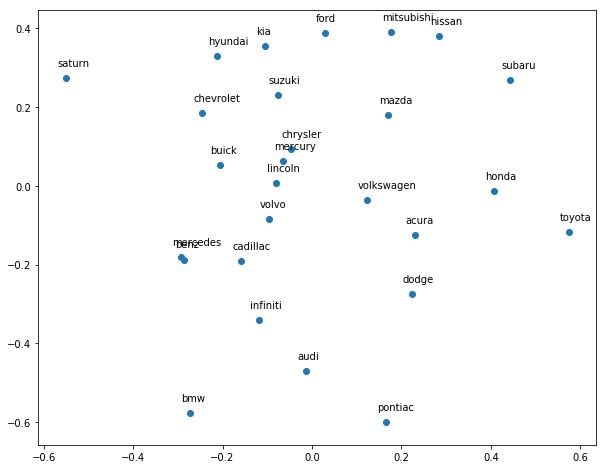

In [19]:
fig = plt.figure(figsize=(10, 8))
x=x_mds[:,0]
y=x_mds[:,1]
label=df_lift.columns.values
plt.scatter(x, y)
for i in range(27):
    plt.text(x[i]-0.02,y[i]+0.03,label[i])
plt.show()

#### MDS-method2

In [20]:
import numpy as np

D=m_lift

N = D.shape[0]
T = np.zeros((N,N))


D2 = D**2
H = np.eye(N) - 1/N
T = -0.5*np.dot(np.dot(H,D2),H)        
eigVal,eigVec = np.linalg.eig(T) 
X = np.dot(eigVec[:,:2],np.diag(np.sqrt(eigVal[:2]))) 

print('original distance','\tnew distance')
for i in range(N):
    for j in range(i+1,N):
        print(np.str(D[i,j]),'\t\t',np.str("%.4f"%np.linalg.norm(X[i]-X[j])))

original distance 	new distance
0.5155268130198493 		 0.5199
0.7136101574140052 		 0.5156
0.26518105849582174 		 0.6364
0.33282928770393955 		 0.6337
0.6553760445682452 		 0.6638
0.46652223253894565 		 0.5139
0.5719591457753017 		 0.4531
0.7425069637883008 		 0.3093
0.4602488004783503 		 0.1193
0.7109109227760327 		 0.6395
0.3689805013927577 		 0.5998
0.48064066852367693 		 0.8098
0.34677523034068997 		 0.5139
0.4790367508311619 		 0.4271
0.5389163446850571 		 0.5472
0.5389163446850571 		 0.5472
0.26518105849582174 		 0.5358
0.16726805228197986 		 0.7242
0.4947720275619411 		 0.4483
0.626459840024533 		 0.6840
1.5026926648096566 		 1.4175
0.6979418136799753 		 0.3777
0.3830393067161869 		 0.7774
0.7759178624940921 		 0.3718
0.3531497750160703 		 0.3909
0.3703390644510614 		 0.4896
0.5868934173874798 		 0.2105
0.593686165273909 		 0.6943
0.27020683932910566 		 0.4882
0.8119186291888242 		 0.8118
0.576983996941395 		 0.6830
0.5540231446882714 		 0.5082
0.6745651501083255 		 0.7702
0.7440

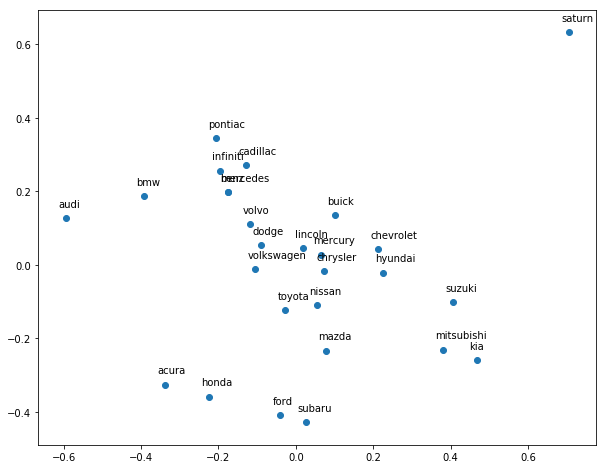

In [21]:
fig = plt.figure(figsize=(10, 8))
x2=X[:,0]
y2=X[:,1]
label=df_lift.columns.values
plt.scatter(x2, y2)
for i in range(27):
    plt.text(x2[i]-0.02,y2[i]+0.03,label[i])
plt.show()